# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [28]:
#Task 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('product_sales.csv')

#Before cleaning
print(df.shape)
print(df.nunique())
print(df.isnull().sum())
print(df.dtypes)

#sales_method
print(df['sales_method'].unique())
df['sales_method'].replace({'em + call':'Email + Call','email':'Email'},inplace =True)

#customer_id

#nb_sold

#revenue
# Calculate average revenue for each nb_sold
avg_revenue = df.groupby('nb_sold')['revenue'].mean()

# Fill in missing revenue values using the average revenue
df['revenue'] = df.apply(lambda row: avg_revenue[row['nb_sold']] if pd.isna(row['revenue']) else row['revenue'], axis=1)

df['revenue']=df['revenue'].round(2)

#years_as_customer
df = df[df['years_as_customer'] <= 39]

#nb_site_visits
#state

#After cleaning
print(df.nunique())
print(df.isnull().sum())
print(df.dtypes)

print(df)
             

(15000, 8)
week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object
['Email' 'Email + Call' 'Call' 'em + call' 'email']
week                     6
sales_method             3
customer_id          14998
nb_sold                 10
revenue               6748
years_as_customer       40
nb_site_visits          27
state                   50
dtype: int64
week        

**Data Validation**

The dataset contains 15000 rows and 8 columns before cleaning and validation. I have validated all the columns against the critera in the dataset table:

- **week**: The column (i.e. week was made, counted as week since product launch) has 6 unique values, has data types of integer and no missing values. Thus, it matches the description and no changes were made. 

- **sales_method:** The column has 5 unique values,namely 1)'Email' 2) 'Email + Call' 3)'Call' 4)'em + call' 5)'email'. This differs from the description due to the typos and inconsitent capitalisation used in the column. The 'em + call' and 'email' values were replaced with 'Email + Call' and 'Email', respectively. The column also has data types of object which is consistent with the data description of character.

- **customer_id:**: The column has 15000 unique values, has data type as object, and has no null values. Thus no changes were made to this column as it matches the description.

- **nb_sold**: The column has 10 unique values, has data type as integer (i.e. numeric), and has no empty values. Thus no changes were made to this column as it matches the description.
 
- **revenue**: The column has 6743 unique values, has data type as float (i.e numeric), and has 1074 of cells with no values. This was cleaned by taking the mean of the revenue by nb_sold groups and applying the mean revenue of each nb_sold group to the appropriate missing values. I chose to apply the mean of each nb_sold group, rather than the entire data set, as the revenue was strongly correlated with increasing nb_sold values. I then rounded the dataset to two decimal places. There are now no missing values in the revenue data set. To ensure all cells were in 2 decimal place, a ROUNDUP function was used.

- **years_as_customer**: The column has 42 unique values, has data type as integer (i.e. numeric), and has no empty values. I removed the two rows of data that exceeded the maximum years one could be a customer. The data set now contains only values from 0 to 39. The entire data set now has 14998 rows.

- **nb_site_visits**: The column has 27 unique values, has data type as integer (i.e. numeric), and has no empty values. This matches the description.No cleaning is needed.

- **state**: The column has 50 unique values, has data type as object (i.e. Character), and has no empty values. This matches the description.No cleaning is needed.

After data validation, the data set conatains 14998 rows and 8 columns without missing values.

# **How many customers were there for each approach?**

Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64


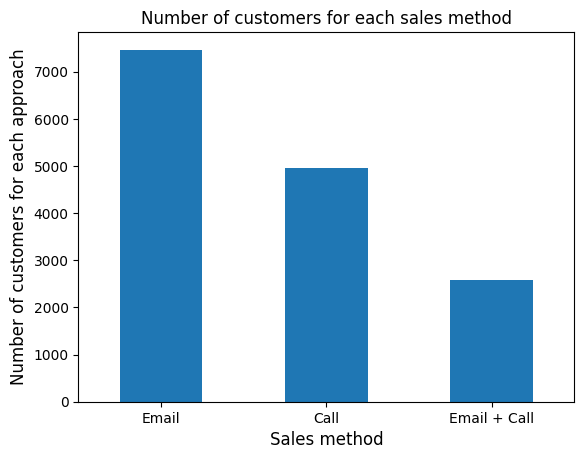

In [29]:
#Task 2 - How many customers were there for each approach?
number_of_customers_each_approach = df['sales_method'].value_counts()
print(number_of_customers_each_approach)

number_of_customers_each_approach.plot(kind='bar')
plt.xlabel('Sales method',fontsize =12)
plt.ylabel('Number of customers for each approach',fontsize =12)
plt.title('Number of customers for each sales method',fontsize =12)
plt.xticks(rotation=0)
plt.show()

![image-6](image-6.png)

Referring to the above figure, the number of customers for each approach is as follows:
- Email:           7465
- Call:            4961
- Email + Call:    2572

The sales method of using email only has the most number of customers, followed by call. The approach of using both email and call has the least number of customers. Notably, we can see that the number of customers for the approach of using email only is more than twice the number of customers for the method which combines bot email and call.



# What does the spread of the revenue look like overall? And for each method?

min      32.540000
max     238.320000
mean     95.029675
std      47.633934
Name: revenue, dtype: float64
                min     max        mean        std
sales_method                                      
Call          32.54  170.16   48.861385  11.531006
Email         64.53  170.16   96.333456  12.042149
Email + Call  64.53  238.32  180.297236  34.154786


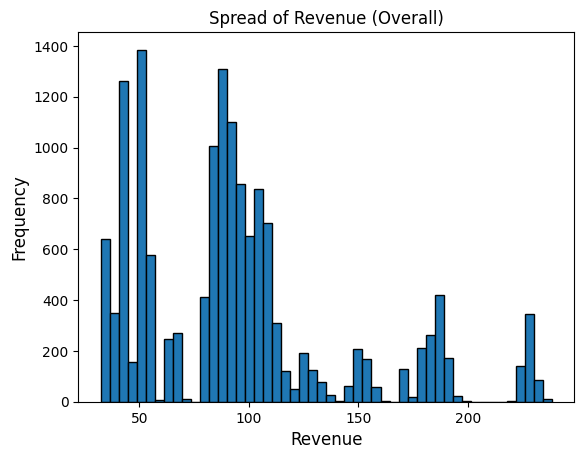

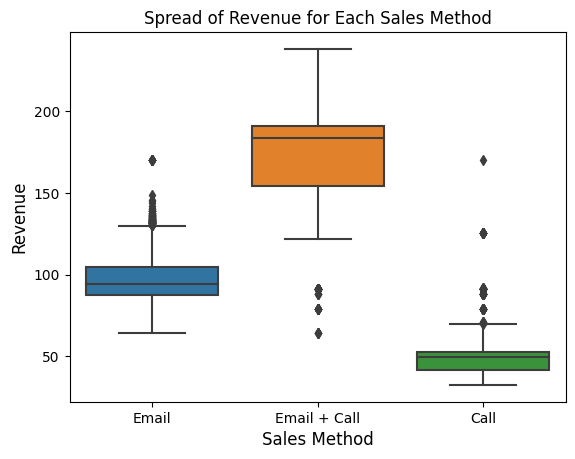

In [30]:
#Task 3 - What does the spread of the revenue look like overall? And for each method?

import seaborn as sns
revenue_spread_overall = df['revenue'].agg(['min','max','mean','std'])
revenue_spread_each_method = df.groupby('sales_method')['revenue'].agg(['min','max','mean','std'])
print(revenue_spread_overall)
print(revenue_spread_each_method)

plt.hist(df['revenue'],bins=50,edgecolor='black')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Spread of Revenue (Overall)', fontsize=12)
# Display the plot
plt.show()

sns.boxplot(x='sales_method', y='revenue', data=df)
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Spread of Revenue for Each Sales Method', fontsize=12)

# Display the plot
plt.show()


![image-2](image-2.png)

In terms of overall including all sales method, the spread of the revenue is as follows:

- minimum:     32.540000
- maximum:    238.320000
- mean:     95.029675
- standard deviation:       47.633934

Referring to the histogram above, we look at the distribution of the revenue to compare the revenue of the company. The majority of the revenue is less than 200. Revenue above 200 could be considered as outliers.

![image-8](image-8.png)

From the multiple boxplot above, we can see revenue range using sales method with a combination of email and call is more significant than other sales method. The majority of the revenue using both email and call ranges from between ~160 to ~190 .

Sales method of email only, is the 2nd sales method that produced the most revenue, behind the method which combines both calls and emails. The revenue produced using email only range from ~80 to ~110. But as you can see from this graph, there are a few outliers in the revenue produced through email only that falls within the range of revenue produced using "calls+email".

Lastly, we can see the revenue generated using calls only is the least. 


# Was there any difference in revenue over time for each of the methods?

    week  sales_method    revenue
0      1          Call   26820.24
1      1         Email  243881.42
2      1  Email + Call   18158.02
3      2          Call   36091.14
4      2         Email  147742.24
5      2  Email + Call   29005.74
6      3          Call   38543.77
7      3         Email  105909.29
8      3  Email + Call   51923.19
9      4          Call   53255.03
10     4         Email  115877.53
11     4  Email + Call   88668.88
12     5          Call   56898.01
13     5         Email   80032.63
14     5  Email + Call  143260.43
15     6          Call   30793.14
16     6         Email   25686.14
17     6  Email + Call  132708.23


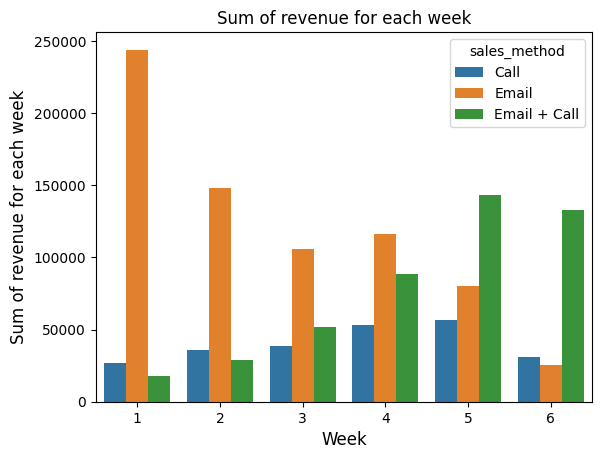

    week  sales_method    revenue  revenue_difference
0      1          Call   26820.24                 NaN
1      1         Email  243881.42                 NaN
2      1  Email + Call   18158.02                 NaN
3      2          Call   36091.14             9270.90
4      2         Email  147742.24           -96139.18
5      2  Email + Call   29005.74            10847.72
6      3          Call   38543.77             2452.63
7      3         Email  105909.29           -41832.95
8      3  Email + Call   51923.19            22917.45
9      4          Call   53255.03            14711.26
10     4         Email  115877.53             9968.24
11     4  Email + Call   88668.88            36745.69
12     5          Call   56898.01             3642.98
13     5         Email   80032.63           -35844.90
14     5  Email + Call  143260.43            54591.55
15     6          Call   30793.14           -26104.87
16     6         Email   25686.14           -54346.49
17     6  Email + Call  1327

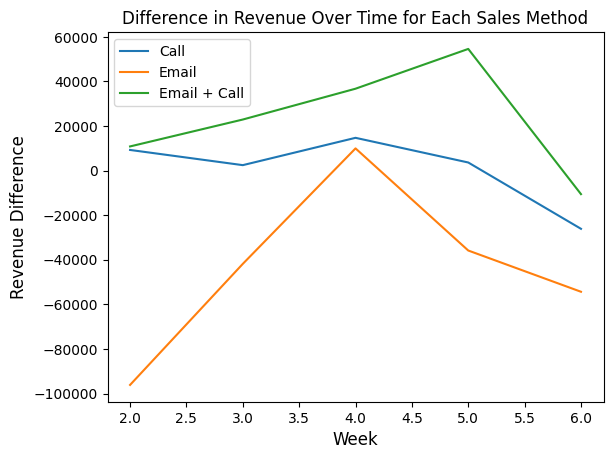

In [31]:
revenue_by_week = df.groupby(['week','sales_method'])['revenue'].sum().reset_index()
print(revenue_by_week)
sns.barplot(x='week',y='revenue',hue='sales_method',data=revenue_by_week)
plt.xlabel('Week',fontsize =12)
plt.ylabel('Sum of revenue for each week',fontsize =12)
plt.title('Sum of revenue for each week',fontsize =12)
plt.xticks(rotation=0)
plt.show()


revenue_by_week = df.groupby(['week','sales_method'])['revenue'].sum().reset_index()
revenue_by_week['revenue_difference'] = revenue_by_week.groupby('sales_method')['revenue'].diff()
print(revenue_by_week)
#print(revenue_difference_by_week)

for method in revenue_by_week['sales_method'].unique():
  method_df = revenue_by_week[revenue_by_week['sales_method'] == method]
  plt.plot(method_df['week'], method_df['revenue_difference'], label=method)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue Difference', fontsize=12)
plt.title('Difference in Revenue Over Time for Each Sales Method', fontsize=12)
plt.legend()

![image-4](image-4.png)
![image-5](image-5.png)

Referring to both the histogram and line charts above, we can see that  revenue generated via sales method using both "Call" only and "Call +Email" increases gradually from week 2 to week 5, followed by a slight decrease in the revenue generated in week 6.

On the other hand, the revenue generated via sales method using "Email" only started as the highest compared to other sales method. However, we can see that the revenue generated using "Email" has decreased significantly thoroughout the week.

In [32]:
earliest_week = df['week'].min()
latest_week = df['week'].max()

# Filter the data for the earliest and latest week
earliest_week_data = df[df['week'] == earliest_week]
latest_week_data = df[df['week'] == latest_week]

# Group revenue by sales method and calculate revenue for the earliest and latest week
earliest_week_revenue = earliest_week_data.groupby('sales_method')['revenue'].sum()
latest_week_revenue = latest_week_data.groupby('sales_method')['revenue'].sum()

# Calculate the revenue growth rate for each sales method
revenue_growth_rate = (latest_week_revenue - earliest_week_revenue) / earliest_week_revenue * 100

# Display the result
print(revenue_growth_rate)

sales_method
Call             14.813067
Email           -89.467775
Email + Call    630.851877
Name: revenue, dtype: float64


# Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

## Business Metrics
Since our goal is to increase the revenue of the company, I would recommend using revenue growth rate. This metric compares the rate of revenue growth between different sales methods. It focuses on the percentage increase in revenue over a specific time period. You can calculate the revenue growth rate for each sales method by comparing the revenue at different points in time. 

The revenue growth rate between the earliest and latest week of the data for each sales method is as follows:

- Call:              14.81%
- Email:           -89.47%
- Email + Call:    630.85%

# Final summary including recommendations that the business should undertake

Based on the metrics of revenue growth rate for each sales method shown above, we can see that the sales method which combined email and call is the ideal sales strategy.Therefore, if this number is increasing, it indicates very good sign to achieve our goal.

## Recommendation

For the following weeks, I would recommend we can focus on the following steps:
- Using key metrics to monitor whether there is a strong sign to see the sales will increase.
- To increase the revenue as soon as possible, we should increase the use of the combination method of emails and calls 
- Cut down the use of sales method via call only to save costs and time spent by a team member on a 30 minutes long call, since the revenue generated through this method seems not ideal. 
- Data Collection for in-depth analysis: 1) Improve data quality (e.g why we do not have value for the revenue generated for some customers) 2) New related data (e.g. which product generated the most profits and revenue and how much time was spent on each customer)
- Further analysis can be conducted to determine the state with the highest demand so that services and sales campaign can be focused on the particular areas
- Understand whether there is correlation between number of times our website was visited by the customer and the revenue generated to better understand the need and type of customers


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation